# Importing Modules

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import RobustScaler,MinMaxScaler
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer


# Loading Data


In [2]:
# Loading Territory Data
kr_terr = pd.read_csv("./South_Korea_territory.csv")
lat_kr = kr_terr["Latitude (deg)"]
lon_kr = kr_terr["Longitude (deg)"]

# Loading Vertiport Data
port_data = pd.read_csv("./Vertiport_candidates.csv")
lat_port = port_data["Latitude (deg)"]
lon_port = port_data["Longitude (deg)"]
port_data

,Longitude (deg),Latitude (deg)
0,126.940197,37.621876
1,127.096292,37.535756
2,126.939432,37.492020
3,127.033749,37.612760
4,126.839673,37.561111
...,...,...
7769,126.855395,33.423088
7770,126.225025,33.268913
7771,126.397977,33.336998
7772,126.719626,33.291340


# Plotting the give dataset
### (Q-1 Visualize the vertiport candidate locations in the Korean peninsula by using the given files)



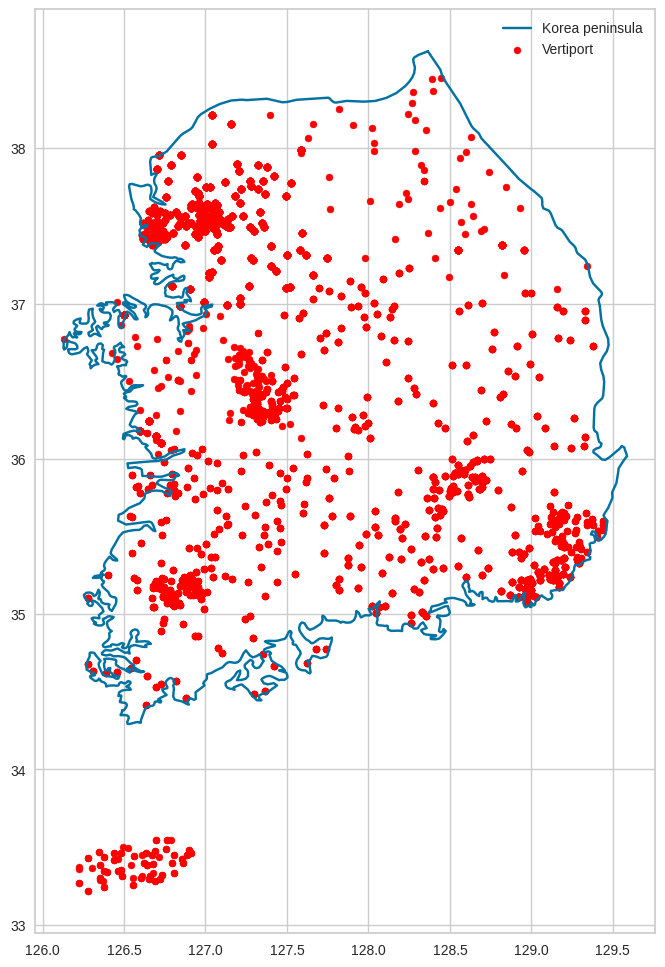

In [3]:
plt.figure(figsize=(8,12))



plt.plot(lon_kr,lat_kr,label="Korea peninsula")
plt.scatter(lon_port,lat_port, marker='.',color='red', label="Vertiport",s=100)
plt.legend()
plt.show()

# Data Preprocessing

# Filter vertiport data to present only vertiport in Korea  peninsula (Remove vertiport data from Jeju island)

In [4]:

# Filter Vertiport Data within Korea Territory (port lat,lon data must be within Korea peninsula)
filtered_lat_port = lat_port[(lat_port >= min(lat_kr)) & (lat_port <= max(lat_kr))]
filtered_lon_port = lon_port[(lon_port >= min(lon_kr)) & (lon_port <= max(lon_kr))]

# After filtering the Dimention is same but shapes (7774,) and (7673,).
# So we need to filter the excess elements in either array are truncated, so that only matching vertiprot data point are retained

# Compare length of two filtered lat and long data set and only use small length data and remove excess point from larger data set.

# Ensure filtered latitude and longitude arrays have the same size

#print(len(filtered_lat_port),len(filtered_lon_port))
min_size = min(len(filtered_lat_port), len(filtered_lon_port))
#print(min_size)

# Filtered_lat_port is small and use all point, but some of the filtered_lon_port data is filtered to got same shape
filtered_lat_port = filtered_lat_port[:min_size]
filtered_lon_port = filtered_lon_port[:min_size]

# Creating a combined dataset for clustering (using filtered Vertiport data)
data = np.vstack((filtered_lat_port, filtered_lon_port)).T






# Data Scaling


In [5]:
# Data Preprocessing: Scaling Vertiport Data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)



#  Making function for clustering and plotting

In [6]:
def kmean_clustering(k,tolerance,max_iter):
    kmeans = KMeans(n_clusters=k,n_init=1, random_state=42,tol=tolerance,max_iter=max_iter)
    clusters = kmeans.fit_predict(scaled_data)

    # Reverse scaling of cluster centers to actual latitude and longitude
    cluster_centers_scaled = kmeans.cluster_centers_
    cluster_centers = scaler.inverse_transform(cluster_centers_scaled)
    print("The final %s vartiport location (lat,Long) are :\n" %k ,cluster_centers)

    # Plotting the clusters with Korea territory as boundaries
    plt.figure(figsize=(8, 12))
    plt.plot(lon_kr, lat_kr, linestyle='-', color='red', label="Korea peninsula Territory")
    plt.scatter(filtered_lon_port, filtered_lat_port, c=clusters, cmap='rainbow')
    plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='*', color='black',
                label="Cluster Centers", s=300)


    plt.legend()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("K-Means Clustering of Vertiport Data with Korea Territory as Boundaries")
    plt.show()
    

# Making variable parameter to pass function for Q-2

## Q- 2  Let’s say that the Korean government allows your team to assign only 17 vertiports in the Korean peninsula (i.e., K=17). Cluster the vertiport candidate locations using the K-Means algorithm and find the 17 centroid points, which become the final vertiport locations in this scenario. 

In [7]:
k = 17 # According to Q-2
tolerance = 0.0001
max_iter = 100


The final 17 vartiport location (lat,Long) are :
 [[ 35.44261974 127.67202074]
 [ 37.55833889 127.01899739]
 [ 35.33565675 129.09099439]
 [ 35.22379528 126.84791359]
 [ 36.9560746  127.99248283]
 [ 36.0788546  126.72340331]
 [ 35.92868884 128.63188335]
 [ 37.13578037 128.81991338]
 [ 37.73477861 127.34715848]
 [ 37.96431005 126.89041407]
 [ 36.36564415 127.36991618]
 [ 37.50007047 126.74897414]
 [ 37.21260088 127.45856192]
 [ 35.33498465 128.2791751 ]
 [ 34.70035133 126.87532588]
 [ 37.04013466 126.87553151]
 [ 36.26895831 128.01085227]]


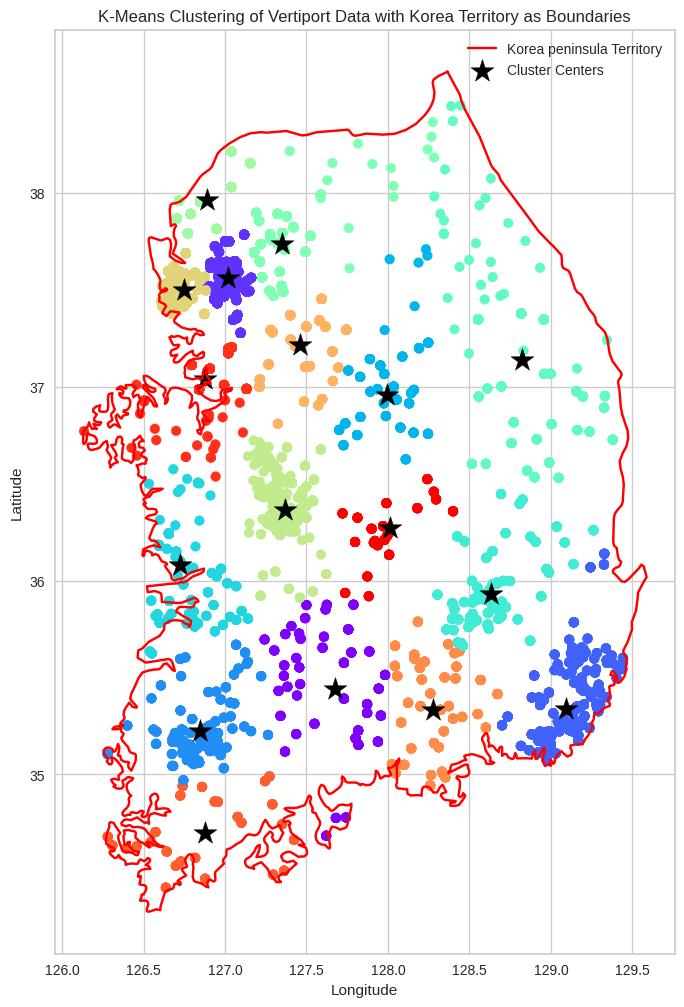

In [8]:

kmean_clustering(k,tolerance,max_iter)

### Q-3. Imagine that the Korean government allows your team to place vertiports as many as your team wants, implying that the government does not have any financial issues. How many vertiports does your team want to establish in the Korean peninsula? Your team may not want to spend unnecessary building costs (e.g., consider all the given vertiports); but would like to invest money in an efficient manner (e.g., find an appropriate number of vertiports).

### Answer
- The sum of square error is relatively flat at k=30.
- So 30 vertiport should be establish in the korea peninsula


# 1. To find optimal value of K, We ue Elbow Method

In [9]:
# Defining variable
k_values = range(1,100)
max_iter = 100
tolerance = 0.0001

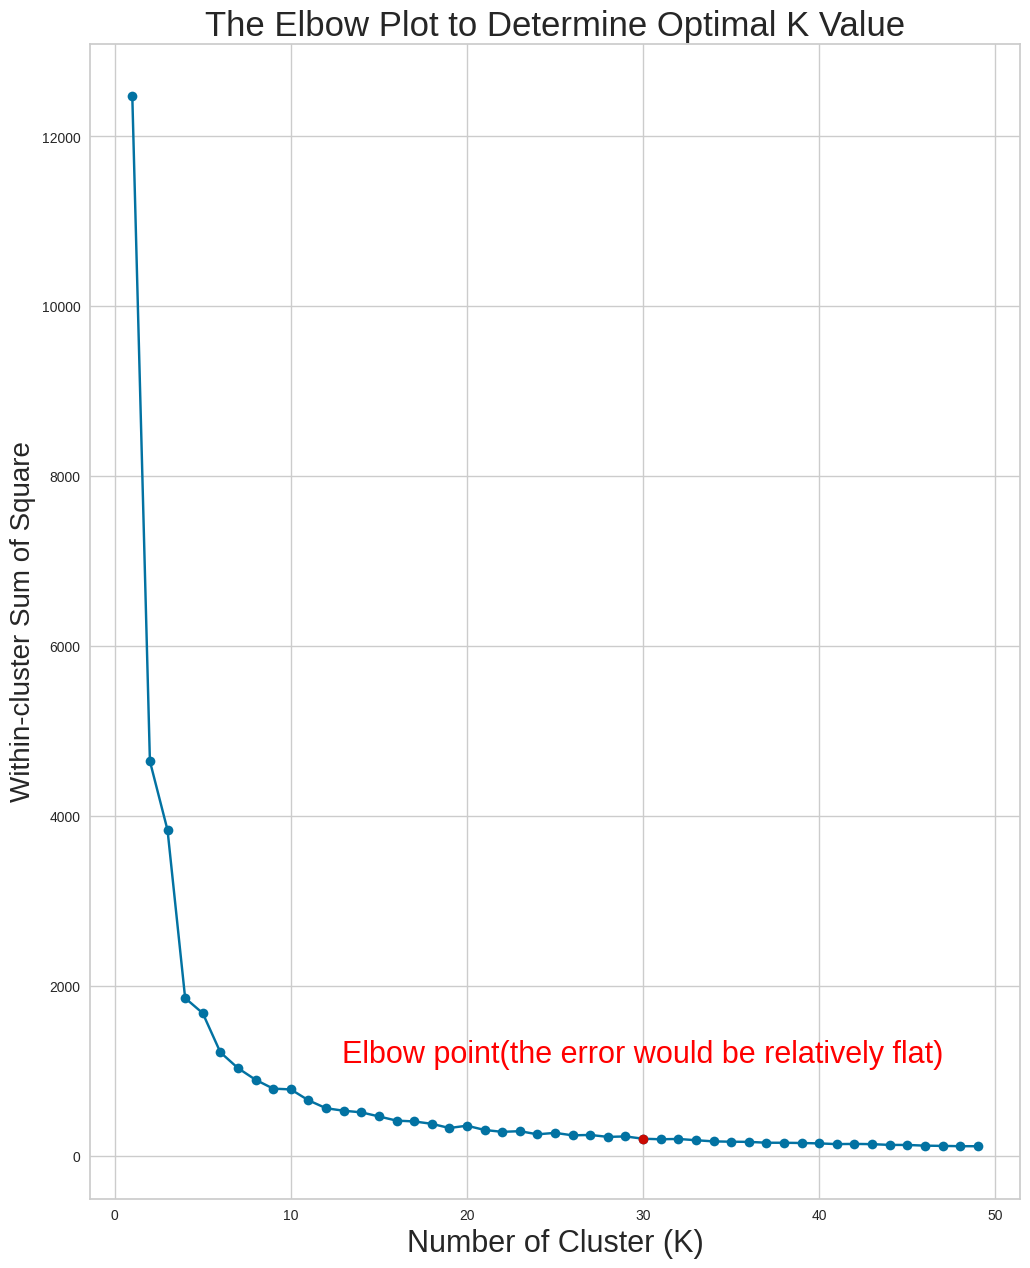

In [10]:

number_cluster = range(1,50)
wcss =[]

for i in (number_cluster):
    kmeans = KMeans(i,n_init=1,max_iter=max_iter,tol=tolerance)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
    # Uncomment to see different error matrix relative to k value 
    #print("number of K is :",i, "The sum of square error is : ",wcss[-1])
    
    
plt.figure(figsize=(12,15))
plt.plot(number_cluster,wcss,'bo-')
plt.title("The Elbow Plot to Determine Optimal K Value", fontsize=25)
plt.xlabel("Number of Cluster (K)", fontsize=22)
plt.ylabel("Within-cluster Sum of Square", fontsize=20)

# Plotting a red dot at the most flat elbow point (x=30)
plt.plot(30, wcss[29], 'ro')




plt.text(30, wcss[29], "Elbow point(the error would be relatively flat)\n\n", ha='center', va='bottom', color='red',fontsize=22)


plt.show()


# 2. Final Ploting with optimal number of vertiport 

In [11]:
# Define Variable 
k = 30 # According to Q-2
tolerance = 0.0001
max_iter = 100




The final 30 vartiport location (lat,Long) are :
 [[ 35.43588591 127.92080627]
 [ 37.50197906 127.06361165]
 [ 35.22329984 128.98897009]
 [ 36.49075766 128.75557163]
 [ 36.17858903 126.67644673]
 [ 35.14149382 126.71571867]
 [ 37.31031981 127.55398732]
 [ 36.38604028 127.36172137]
 [ 37.61989287 126.97405064]
 [ 35.84681727 128.55865656]
 [ 36.95770051 128.03470996]
 [ 37.30802994 128.72936217]
 [ 35.23367184 128.2728131 ]
 [ 36.8906931  126.51531711]
 [ 37.82024523 127.36752823]
 [ 37.08659714 127.04128896]
 [ 36.49229626 129.16988746]
 [ 37.49748522 126.73825183]
 [ 35.83262161 127.55634759]
 [ 34.58656183 126.58287848]
 [ 37.99171636 128.28896753]
 [ 35.45106332 127.33074026]
 [ 36.27665437 127.99895774]
 [ 37.47196343 127.30317671]
 [ 37.0334279  127.59092216]
 [ 37.96431005 126.89041407]
 [ 35.20701708 126.95267768]
 [ 35.4578539  129.2189276 ]
 [ 35.81859046 126.83716055]
 [ 34.74605405 127.3758164 ]]


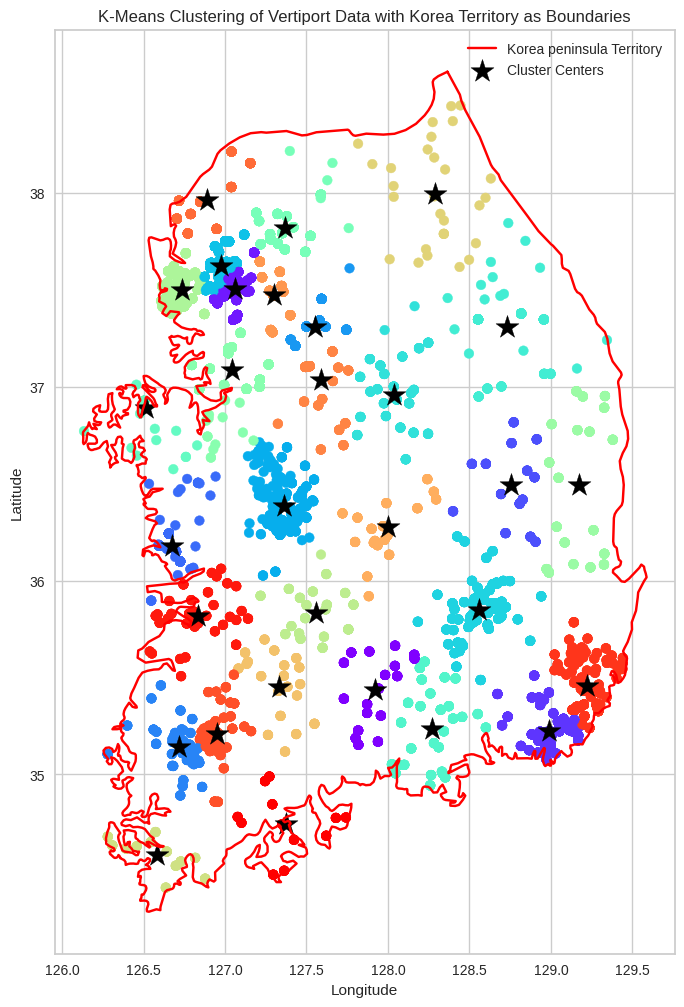

In [12]:
 kmean_clustering(k,tolerance,max_iter)

# Testing................

# Multiple Plot with different K

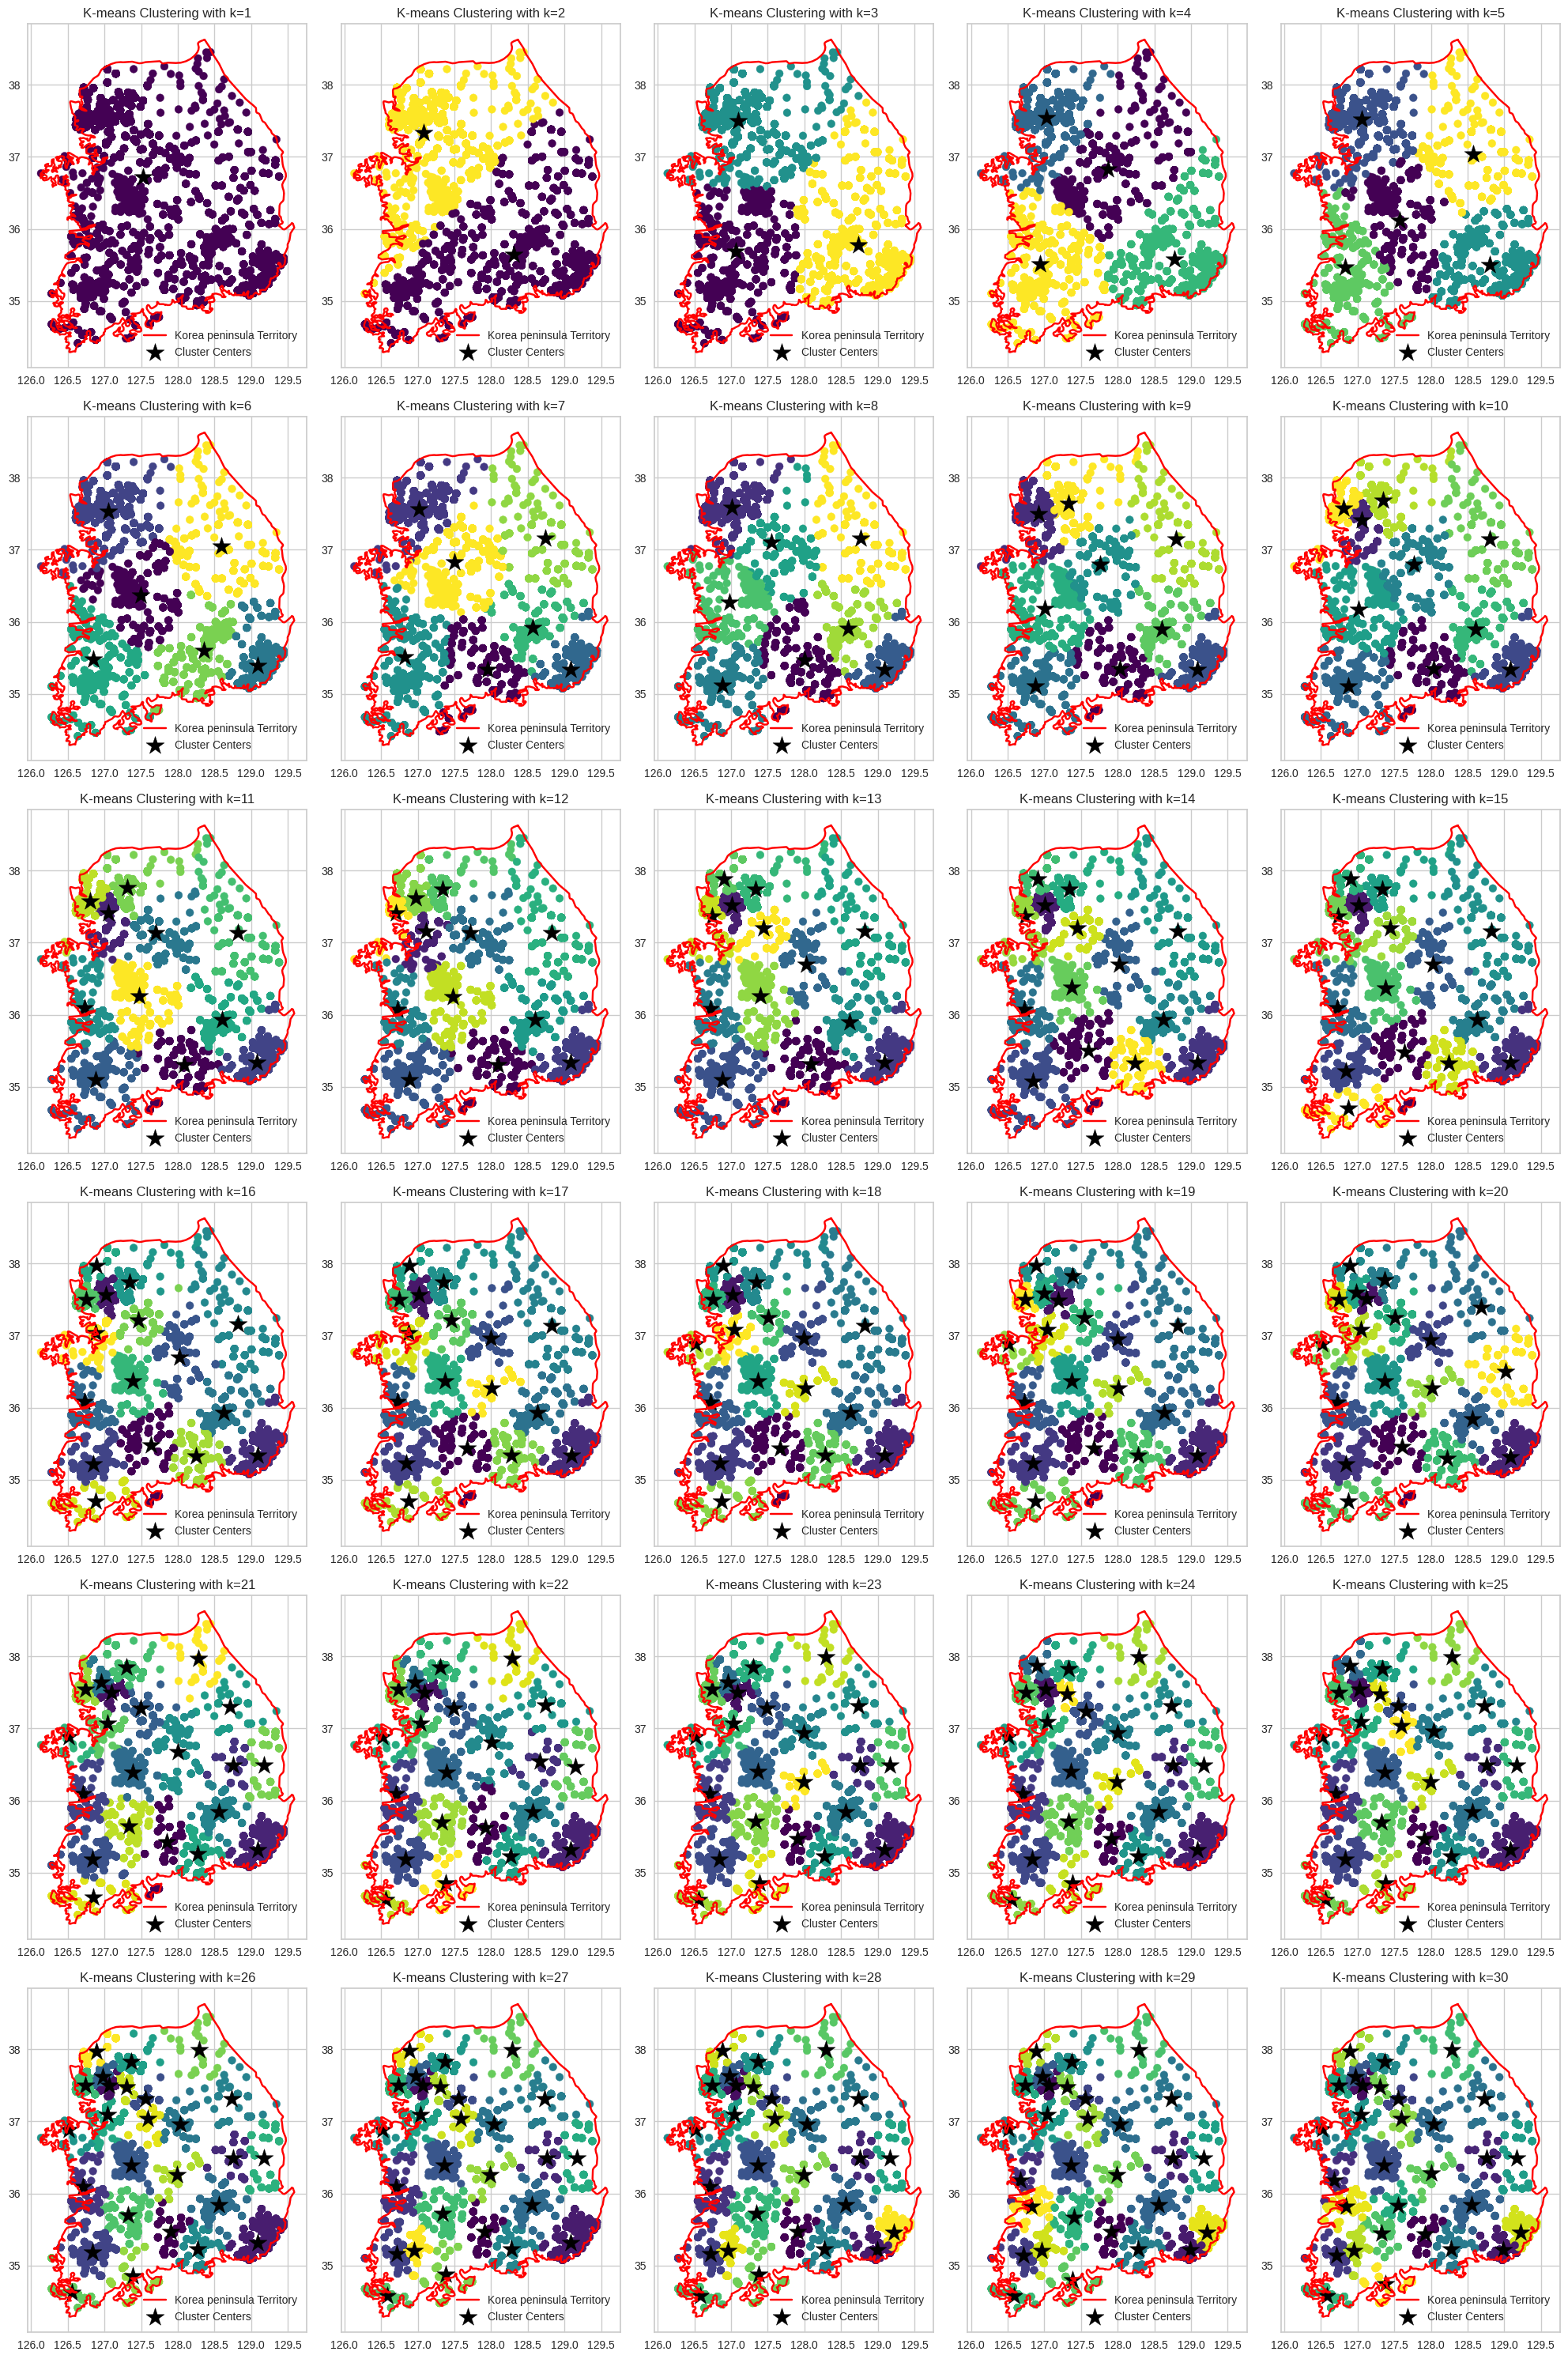

In [13]:
max_k = 30 # For testing with multiple k
fig, axs = plt.subplots(6, 5, figsize=(20, 30))

for k in range(1, max_k + 1):
    row = (k - 1) // 5  # Calculate the row index
    col = (k - 1) % 5   # Calculate the column index

    kmeans = KMeans(n_clusters=k, n_init=1, random_state=42,tol=tolerance,max_iter=max_iter)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    
    
    cluster_centers_scaled = kmeans.cluster_centers_
    cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

    axs[row, col].plot(lon_kr, lat_kr, linestyle='-', color='red', label="Korea peninsula Territory")
    axs[row, col].scatter(filtered_lon_port, filtered_lat_port, c=labels, cmap='viridis')

    # Plot the territories
    axs[row, col].fill(lon_kr, lat_kr, facecolor='none', edgecolor='red')

    # Plot the centroids on top
    axs[row, col].scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='*', color='black', label="Cluster Centers", s=300)

    axs[row, col].set_title(f'K-means Clustering with k={k}')
    axs[row, col].legend()

# Remove empty subplots
if max_k < 31:
    for k in range(max_k, 12):
        row = k // 4
        col = k % 4
        fig.delaxes(axs[row, col])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()
